# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from config import *

val_df = pd.read_csv(f"{folder_path}/player_valuations.csv")

# Data Preparation of Players Valuations

In [2]:
val_df.shape

(440663, 9)

In [3]:
val_df.head(10)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
5,77,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,13000000,1,506,IT1
6,80,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,400000,1,27,L1
7,109,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,9500000,1,825,TR1
8,123,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,9500000,1,33,L1
9,132,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,13000000,1,11,GB1


In [4]:
val_df.columns

Index(['player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value_in_eur', 'n', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [5]:
# renaming columns
val_df = val_df.rename(columns={
    'current_club_id':'club_id',
    'player_club_domestic_competition_id':'league_id',
})

val_df

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,club_id,league_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,1000000,1,1091,GR1
440659,968903,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,653,GR1
440660,1031590,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,6418,GR1
440661,1166093,2023,2023-09-21 00:00:00,2023-09-21,2023-09-18,50000,1,30120,GR1


In [6]:
# checking NA values
val_df.isna().sum()

player_id              0
last_season            0
datetime               0
date                   0
dateweek               0
market_value_in_eur    0
n                      0
club_id                0
league_id              0
dtype: int64

In [7]:
# checking duplicates
val_df.loc[val_df.duplicated()]

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,club_id,league_id


In [8]:
val_df.dtypes

player_id               int64
last_season             int64
datetime               object
date                   object
dateweek               object
market_value_in_eur     int64
n                       int64
club_id                 int64
league_id              object
dtype: object

In [9]:
# converting data types and adding columns

val_df['market_value_mln'] = val_df['market_value_in_eur']/1e6

val_df['datetime'] = pd.to_datetime(val_df['datetime'])

val_df.dtypes

player_id                       int64
last_season                     int64
datetime               datetime64[ns]
date                           object
dateweek                       object
market_value_in_eur             int64
n                               int64
club_id                         int64
league_id                      object
market_value_mln              float64
dtype: object

In [10]:
val_df.head(10)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,club_id,league_id,market_value_mln
0,3132,2013,2003-12-09,2003-12-09,2003-12-08,400000,1,126,TR1,0.4
1,6893,2012,2003-12-15,2003-12-15,2003-12-15,900000,1,984,GB1,0.9
2,10,2015,2004-10-04,2004-10-04,2004-10-04,7000000,1,398,IT1,7.0
3,26,2017,2004-10-04,2004-10-04,2004-10-04,1500000,1,16,L1,1.5
4,65,2015,2004-10-04,2004-10-04,2004-10-04,8000000,1,1091,GR1,8.0
5,77,2012,2004-10-04,2004-10-04,2004-10-04,13000000,1,506,IT1,13.0
6,80,2017,2004-10-04,2004-10-04,2004-10-04,400000,1,27,L1,0.4
7,109,2012,2004-10-04,2004-10-04,2004-10-04,9500000,1,825,TR1,9.5
8,123,2012,2004-10-04,2004-10-04,2004-10-04,9500000,1,33,L1,9.5
9,132,2015,2004-10-04,2004-10-04,2004-10-04,13000000,1,11,GB1,13.0


In [11]:
# eliminiamo la colonna n (tutti valori 1)
val_df.drop(columns='n', inplace=True)

In [12]:
val_df['last_season'].describe()

count    440663.000000
mean       2018.762887
std           3.624305
min        2012.000000
25%        2016.000000
50%        2019.000000
75%        2022.000000
max        2023.000000
Name: last_season, dtype: float64

In [13]:
val_df

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,club_id,league_id,market_value_mln
0,3132,2013,2003-12-09,2003-12-09,2003-12-08,400000,126,TR1,0.40
1,6893,2012,2003-12-15,2003-12-15,2003-12-15,900000,984,GB1,0.90
2,10,2015,2004-10-04,2004-10-04,2004-10-04,7000000,398,IT1,7.00
3,26,2017,2004-10-04,2004-10-04,2004-10-04,1500000,16,L1,1.50
4,65,2015,2004-10-04,2004-10-04,2004-10-04,8000000,1091,GR1,8.00
...,...,...,...,...,...,...,...,...,...
440658,950091,2023,2023-09-21,2023-09-21,2023-09-18,1000000,1091,GR1,1.00
440659,968903,2023,2023-09-21,2023-09-21,2023-09-18,50000,653,GR1,0.05
440660,1031590,2023,2023-09-21,2023-09-21,2023-09-18,50000,6418,GR1,0.05
440661,1166093,2023,2023-09-21,2023-09-21,2023-09-18,50000,30120,GR1,0.05


In [14]:
val_df['last_season'].describe()

count    440663.000000
mean       2018.762887
std           3.624305
min        2012.000000
25%        2016.000000
50%        2019.000000
75%        2022.000000
max        2023.000000
Name: last_season, dtype: float64

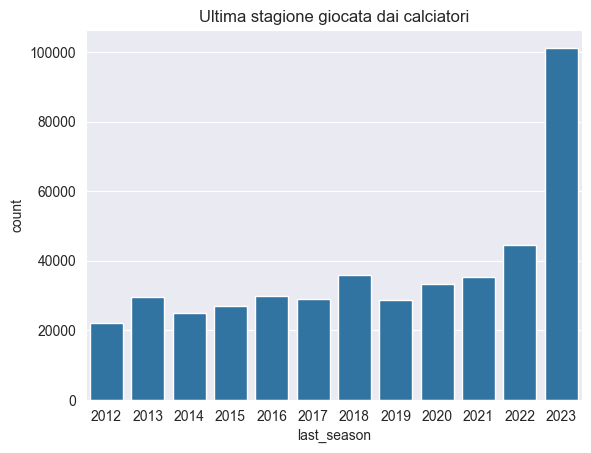

In [15]:
sns.countplot(data=val_df, x='last_season')
plt.title('Ultima stagione giocata dai calciatori')
plt.show()

In [16]:
current_players_val = val_df.query('last_season == 2023')

current_players_val

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,club_id,league_id,market_value_mln
186,3333,2023,2004-10-04,2004-10-04,2004-10-04,7500000,1237,GB1,7.50
343,4391,2023,2004-10-04,2004-10-04,2004-10-04,1300000,383,NL1,1.30
743,8246,2023,2004-10-04,2004-10-04,2004-10-04,50000,3,L1,0.05
782,9500,2023,2004-10-04,2004-10-04,2004-10-04,750000,903,SC1,0.75
884,12029,2023,2004-10-04,2004-10-04,2004-10-04,1500000,1421,FR1,1.50
...,...,...,...,...,...,...,...,...,...
440657,933897,2023,2023-09-21,2023-09-21,2023-09-18,50000,3060,GR1,0.05
440658,950091,2023,2023-09-21,2023-09-21,2023-09-18,1000000,1091,GR1,1.00
440659,968903,2023,2023-09-21,2023-09-21,2023-09-18,50000,653,GR1,0.05
440660,1031590,2023,2023-09-21,2023-09-21,2023-09-18,50000,6418,GR1,0.05


# Saving processed data to feather file

In [26]:
current_players_val.to_feather('../cleaned_data/players_valuation.feather')